### Support Vector Machines
In the first half of this exercise, you will be using support vector machines
(SVMs) with various example 2D datas. Experimenting with these datas
will help you gain an intuition of how SVMs work and how to use a Gaussian
kernel with SVMs. In the next half of the exercise, you will be using support
vector machines to build a spam classifier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

#### 1.1 Example data 1
We will begin by with a 2D example data which can be separated by a
linear boundary.

In [2]:
# Visualizing the data
data1 = io.loadmat('../MachineLearning/data/ex6data1.mat')
X1 = data1['X']
y1 = data1['y']
data = np.c_[X1, y1]
pos1 = data[data[:, 2] == 1]
neg1 = data[data[:, 2] == 0]

In [3]:
def plotScatterData(pos, neg):
    plt.figure(figsize=(10, 8))
    plt.scatter(pos[:, 0], pos[:, 1], s=30, marker='+', c='k', label='pos')
    plt.scatter(neg[:, 0], neg[:, 1], s=30, marker='o', c='y', label='neg')

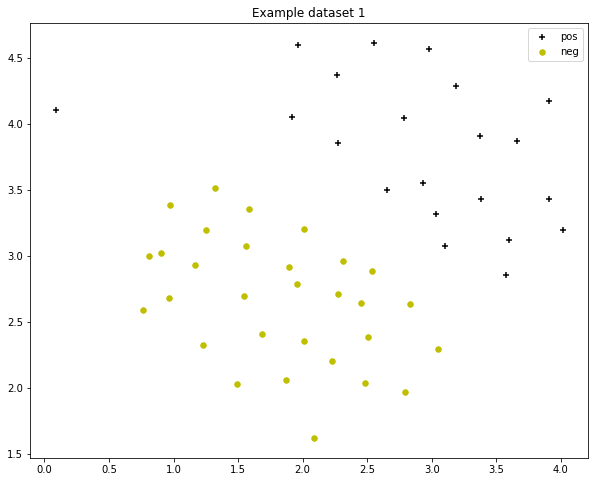

In [4]:
plotScatterData(pos1, neg1)
plt.title('Example data 1')
plt.legend()
plt.show()

In [5]:
from sklearn import svm

In [6]:
# C=1
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
print(svc.get_params())
svc.fit(X1, y1.ravel())
svc.score(X1, y1.ravel())

{'C': 1, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


/home/archtao/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9803921568627451

In [7]:
def findDecisionBoundary(svc, x1min, x1max, x2min, x2max, diff):
    x1 = np.linspace(x1min, x1max, 1000)
    x2 = np.linspace(x2min, x2max, 1000)

    coordinates = np.array([[x, y] for x in x1 for y in x2])
    res = svc.decision_function(coordinates)
    coordinates = np.c_[coordinates, np.abs(res)]
    coordinates = coordinates[coordinates[:, 2] < diff]

    return coordinates[:, 0], coordinates[:, 1]

In [8]:
plt_x1, plt_x2 = findDecisionBoundary(svc, 0, 4, 1.5, 5, 5e-4)

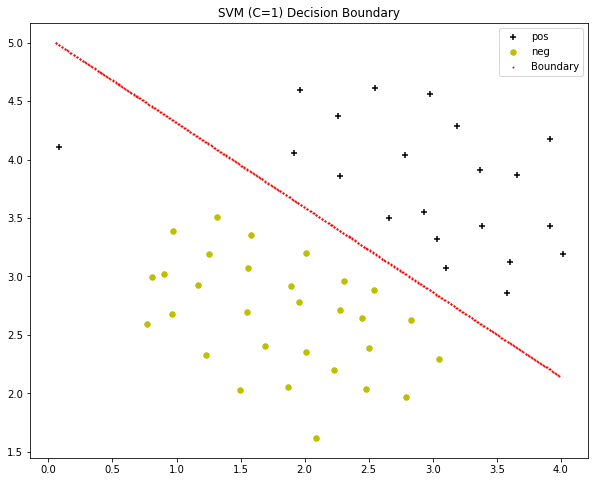

In [9]:
plotScatterData(pos1, neg1)
plt.scatter(plt_x1, plt_x2, s=1, c='r', label='Boundary')
plt.title('SVM (C=1) Decision Boundary')
plt.legend()
plt.show()

In [10]:
# C=100
svc = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc.fit(X1, y1.ravel())
svc.score(X1, y1.ravel())

/home/archtao/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9411764705882353

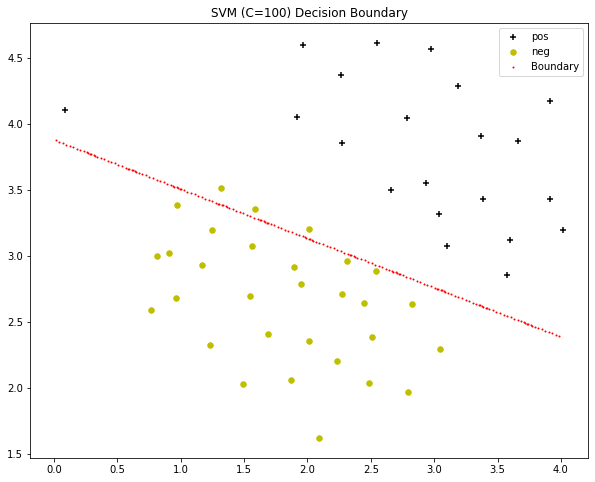

In [11]:
plt_x1, plt_x2 = findDecisionBoundary(svc, 0, 4, 1.5, 5, 1e-3)
plotScatterData(pos1, neg1)
plt.scatter(plt_x1, plt_x2, s=1, c='r', label='Boundary')
plt.title('SVM (C=100) Decision Boundary')
plt.legend()
plt.show()

#### 1.2 SVM with Gaussian Kernels
In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on
datas that are not linearly separable.

##### 1.2.1 gaussian kernel
You should now complete the code in gaussianKernel to compute the Gaussian kernel between two examples, $(x^{(i)},x^{(j)})$. The Gaussian kernel function is defined as:$$K_{gaussian}(x^{(i)},x^{(j)})=\exp\left(-\frac{\lVert x^{(i)}-x^{(j)}\rVert^2}{2\sigma^2}\right)=\exp\left(-\frac{\sum\limits_{k=1}^{n}(x_{k}^{(i)}-x_{k}^{(j)})^2}{2\sigma^2}\right)$$The bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases(to 0).

In [12]:
def gaussianKernel(x1, x2, sigma):
    return np.exp(-np.sum(np.power(x1 - x2, 2)) / (2 * (sigma ** 2)))

In [13]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
gaussianKernel(x1, x2, 2)

0.32465246735834974

##### 1.2.2 Example data 2
Fromthe figure, you can obserse that there is no linear decision boundary that separates the positive and negative examples for this data. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for the data.

In [14]:
data2 = io.loadmat('../MachineLearning/data/ex6data2.mat')
print(data2.keys())
X2 = data2['X']
y2 = data2['y']
data = np.c_[X2, y2]
pos2 = data[data[:, 2] == 1]
neg2 = data[data[:, 2] == 0]

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


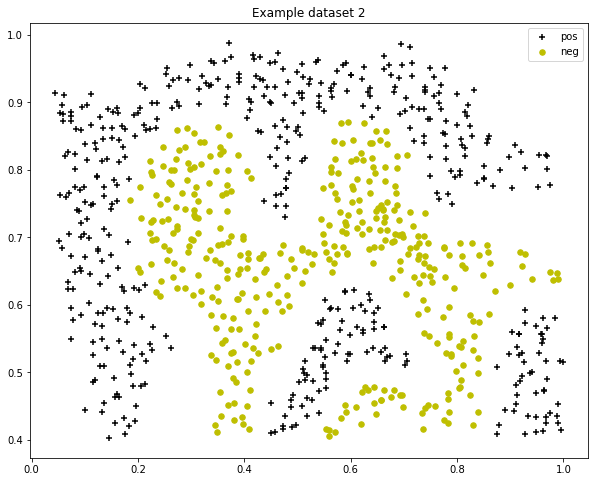

In [15]:
plotScatterData(pos2, neg2)
plt.title('Example data 2')
plt.legend()
plt.show()

In [16]:
svc = svm.SVC(C=100, gamma=10, probability=True)
svc.get_params()

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 10,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [17]:
svc.fit(X2, y2.ravel())
svc.score(X2, y2.ravel())

0.9698725376593279

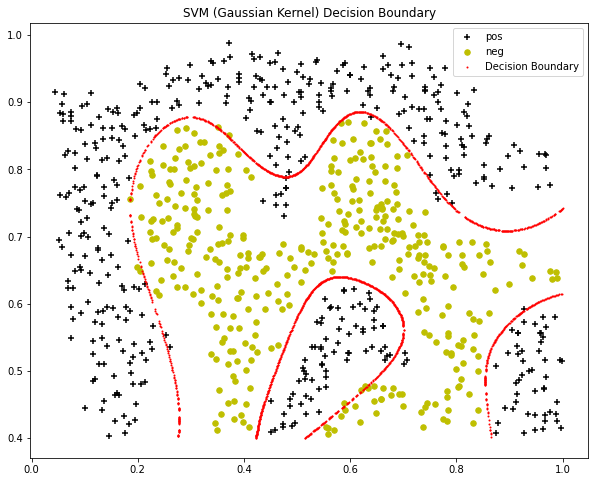

In [18]:
plt_x1, plt_x2 = findDecisionBoundary(svc, 0, 1, 0.4, 1, 8e-3)
plotScatterData(pos2, neg2)
plt.scatter(plt_x1, plt_x2, s=1, c='r', label='Decision Boundary')
plt.title('SVM (Gaussian Kernel) Decision Boundary')
plt.legend()
plt.show()

##### 1.2.3 Example data 3
Your task is to use the cross validation set Xval, yval to determine the best $C$ and $\sigma$ parameter to use. You should write any additional code necessary to help you search over the parameters $C$ and $\sigma$.

In [19]:
data3 = io.loadmat('../MachineLearning/data/ex6data3.mat')
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [20]:
X3 = data3['X']
y3 = data3['y']
X3val = data3['Xval']
y3val = data3['yval']
data = np.c_[X3, y3]
pos3 = data[data[:, 2] == 1]
neg3 = data[data[:, 2] == 0]
X3.shape

(211, 2)

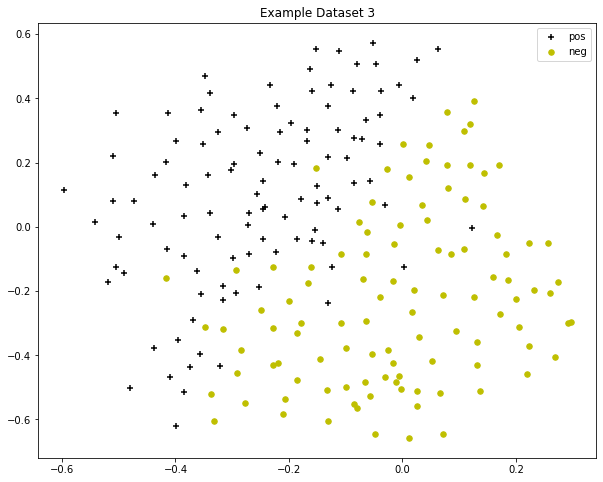

In [21]:
plotScatterData(pos3, neg3)
plt.title('Example data 3')
plt.legend()
plt.show()

In [22]:
def dataParams(C_range, sigma_range, X, y, Xval, yval):
    values = [[i, j] for i in C_range for j in sigma_range]
    best_score = 0
    best_params = {'C': None, 'sigma': None}

    for item in values:
        svc = svm.SVC(C=item[0], gamma=item[1])
        svc.fit(X, y)
        score = svc.score(Xval, yval)

        if score > best_score:
            best_score = score
            best_params['C'] = item[0]
            best_params['sigma'] = item[1]
    
    return best_params, best_score

In [23]:
C_range = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
sigma_range = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
best_params, best_score = dataParams(C_range, sigma_range, X3, y3.ravel(), X3val, y3val.ravel())
best_params, best_score

({'C': 0.3, 'sigma': 100}, 0.965)

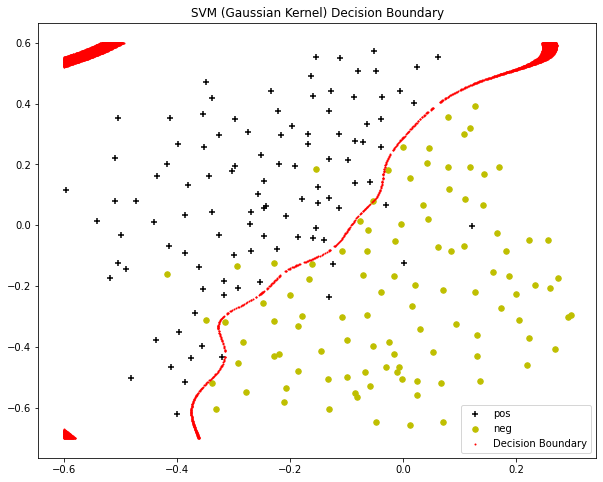

In [24]:
svc = svm.SVC(C=best_params['C'], gamma=best_params['sigma'])
svc.fit(X3, y3.ravel())

plt_x1, plt_x2 = findDecisionBoundary(svc, -0.6, 0.3, -0.7, 0.6, 3e-3)
plotScatterData(pos3, neg3)
plt.scatter(plt_x1, plt_x2, s=1, c='r', label='Decision Boundary')
plt.title('SVM (Gaussian Kernel) Decision Boundary')
plt.legend()
plt.show()

### 2 Spam Classification
You will be training a classifier to classify whether a given email, x, is spam (y=1) or non-spam(y=0). In particular, you need to convert each email into a feature vector $x\in R^n$.

#### 2.1 Preprocessing Emails

In [28]:
spam_train = io.loadmat('../MachineLearning/data/spamTrain.mat')
spam_test = io.loadmat('../MachineLearning/data/spamTest.mat')
spam_train.keys(), spam_test.keys()

(dict_keys(['__header__', '__version__', '__globals__', 'X', 'y']),
 dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest']))

In [37]:
spam_X = spam_train['X']
spam_y = spam_train['y'].ravel()
spam_Xtest = spam_test['Xtest']
spam_ytest = spam_test['ytest'].ravel()
spam_X.shape, spam_y.shape

((4000, 1899), (4000,))

In [52]:
svc = svm.SVC()
svc.fit(spam_X, spam_y)
print(f'Train accuracy {np.round(svc.score(spam_X, spam_y) * 100 , 2)}%')
print(f'Test accuracy {np.round(svc.score(spam_Xtest, spam_ytest) * 100 , 2)}%')

Train accuracy 99.32%
Test accuracy 98.7%


In [56]:
import pandas as pd

kw = np.eye(1899)
spam_val = pd.DataFrame({'index': range(1899)})

In [57]:
spam_val['param'] = svc.decision_function(kw)
spam_val['param'].describe()

count    1899.000000
mean       -0.110039
std         0.049094
min        -0.428396
25%        -0.131213
50%        -0.111985
75%        -0.091973
max         0.396286
Name: param, dtype: float64

In [73]:
decision = spam_val[spam_val['param'] > 0.1]
decision

,index,param
297,297,0.396286
680,680,0.109643
774,774,0.181496
1088,1088,0.132633
1190,1190,0.232788
1263,1263,0.160806
1397,1397,0.218337
1795,1795,0.125143
1894,1894,0.101613


In [65]:
voc = pd.read_csv('../MachineLearning/data/vocab.txt', header=None, names=['index', 'voc'], sep='\t')
voc.head()

,index,voc
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about


In [77]:
voc.loc[list(decision['index'])]

,index,voc
297,298,click
680,681,free
774,775,here
1088,1089,nbsp
1190,1191,our
1263,1264,pleas
1397,1398,remov
1795,1796,visit
1894,1895,your
